# RHONN trained with EKF (scalar parameters)

In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
S = lambda x: 1 / (1 + np.exp(-x))

In [11]:
#@interact(P=(10E-10,10E10,10E1))
def sim(P,Q,R,eta):
    
    tf = 30 #segundo
    T = 0.01
    x0 = 5

    x = np.zeros( int(tf/T) +1 )
    X = np.zeros( int(tf/T) +1 )
    u = np.zeros( int(tf/T) +1 )

    x[0] = x0
    u[0] = 0

    np.random.seed(9)
    w = np.random.normal(0,1)
    X[0] = np.random.normal(0,1)
    

    t = np.arange(0,tf,T)
    xref = np.sin(t)

    tsim = list( range(0, int(tf/T) ) )
    
    S = lambda x: 1 / (1 + np.exp(-x))


    #P = 10E-10 
    #Q = 10E-6
    #R = 10E-15
    #eta = 0.1
    wf = 1

    for k in tsim:
        u[k+1] = -3*x[k]  - 0.5*(x[k] - xref[k] ) # control law 
        x[k+1] = x[k] + T *(3*x[k] + u[k]) # system's state
        e = x[k] - X[k] # identification error
        H = S(x[k])**2 # partial derivative of one of nn state with respect to one nn weight
        M = 1/(R + H*P*H) # 
        K = P * H * M # Kalman gain
        P = P - K*H*P + Q
        w = w + eta*K*e
        X[k+1] = w*S(x[k])**2 + wf*u[k]

    #tmp= int(.6/T)
    tmp = 0
    
    plt.plot(t[tmp:],x[tmp:-1], label='System')
    plt.plot(t[tmp:],xref[tmp:], label='Reference')
    plt.plot(t[tmp:],X[tmp:-1], label='RHONN')
    plt.legend()
    
valmin = 0
valmax = 100000
valstep = 10
interact_manual(sim,P=widgets.FloatSlider(value=10, min=valmin, max=valmax, step=valstep),
               Q=widgets.FloatSlider(value=10,min=valmin, max=valmax, step=valstep),
               R=widgets.FloatSlider(value=10,min=valmin, max=valmax, step=valstep),
               eta=widgets.FloatSlider(value=0.001,min=0, max=5, step=0.001,readout_format=".4f" ));
    
#plt.plot(t,x[:-1]-X[:-1])
#8070.00,15270.00,92300.00,3.2830

interactive(children=(FloatSlider(value=10.0, description='P', max=100000.0, step=10.0), FloatSlider(value=10.…

Sol

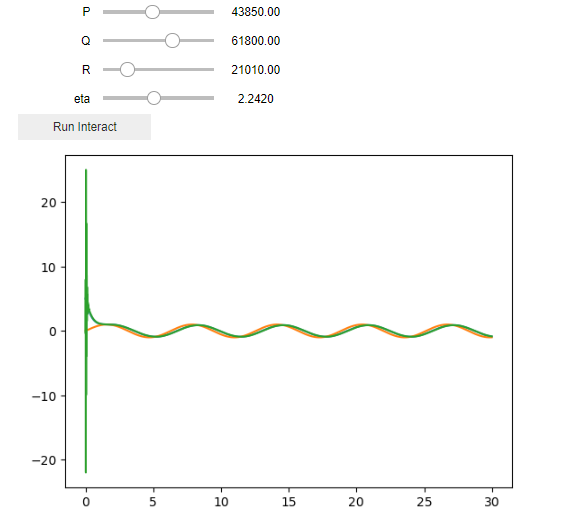

In [16]:
np.zeros( (2,4) ).shape

(2, 4)

In [24]:
x = np.array( [1,5 ])
x

array([1, 5])

In [26]:
np.expand_dims(x,axis=1).shape

(2, 1)

In [27]:
np.expand_dims?

In [64]:
def sim(P,Q,R,eta):
    
    tf = 30 #segundo
    T = 0.01
    x0 = np.array([5,3])
    
    x = np.zeros( (2,int(tf/T) +1) )
    X = np.zeros( (2,int(tf/T) +1) )
    u = np.zeros( (int(tf/T) +1) )

    x[:,0] = x0
    u[0] = 0

    np.random.seed(9)
    w0 = np.random.normal(0,1,(2,1))
    w1 = np.random.normal(0,1,(2,1))
    
    X[:,0] = np.random.normal(0,1,2)
    
    t = np.arange(0,tf,T)
    xref = np.sin(t)

    tsim = list( range(0, int(tf/T) ) )
    
    S = lambda x: 1 / (1 + np.exp(-x))
    #P = 10E-10 
    #Q = 10E-6
    #R = 10E-15
    #eta = 0.1
    wf = 1

    for k in tsim:
        u[k+1] = -10*x[0,k] -14*x[1,k] - 14*(x[0,k] - xref[k] ) # control law 
        x[0,k+1] = x[0,k] + T *( 3*x[0,k] + 5*x[1,k] ) # system's state
        x[1,k+1] = x[1,k] + T *( 2*x[0,k] + 3*x[1,k] + u[k]) # system's state
        
        
        e = x[0,k] - X[0,k] # error x0 - X0
        H = np.array( [ [S(x[0,k])], [S(x[0,k])] ] )  # partial derivative of one of nn state with respect to one nn weight
        M = np.linalg.pinv(R + H*P*H) # 
        K = P * H * M # Kalman gain
        P = P - K*H*P + Q
        w0 = w0 + eta*K*e
        
        X[0,k+1] = w0[0]*S(x[0,k]) + w0[1]*S(x[0,k])
        #X[1,k+1] = w1[0]*S(x[k]) + w1[1]*S(x[k]) + wf*u[k]

    #tmp= int(.6/T)
    tmp = 0
    
    plt.plot(t[tmp:],x[0,tmp:-1], label='System')
    plt.plot(t[tmp:],xref[tmp:], label='Reference')
    #plt.plot(t[tmp:],X[tmp:-1], label='RHONN')
    plt.legend()
    
valmin = 0
valmax = 100000
valstep = 10
interact_manual(sim,P=widgets.FloatSlider(value=10, min=valmin, max=valmax, step=valstep),
               Q=widgets.FloatSlider(value=10,min=valmin, max=valmax, step=valstep),
               R=widgets.FloatSlider(value=10,min=valmin, max=valmax, step=valstep),
               eta=widgets.FloatSlider(value=0.001,min=0, max=5, step=0.001,readout_format=".4f" ));
    
#plt.plot(t,x[:-1]-X[:-1])
#8070.00,15270.00,92300.00,3.2830

interactive(children=(FloatSlider(value=10.0, description='P', max=100000.0, step=10.0), FloatSlider(value=10.…

In [62]:
x = np.array( [ 5,9 ] )
np.expand_dims(x,axis=1).shape

(2, 1)

Solo el primer estado generamos la red

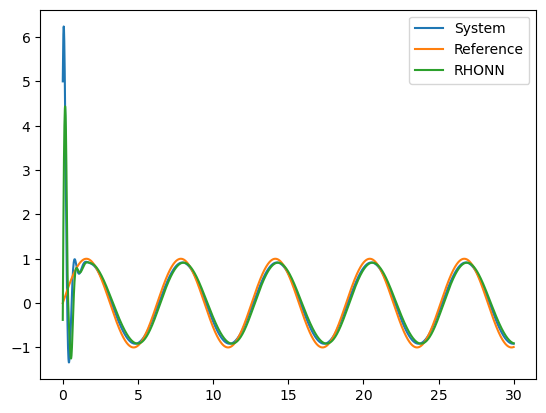

In [77]:
tf = 30 #segundo
T = 0.01
x0 = np.array([5,3])

x = np.zeros( (2,int(tf/T) +1) )
X = np.zeros( (2,int(tf/T) +1) )
u = np.zeros( (int(tf/T) +1) )

x[:,0] = x0
u[0] = 0

np.random.seed(9)
w0 = np.random.normal(0,1,(2,1))
w1 = np.random.normal(0,1,(2,1))

X[:,0] = np.random.normal(0,1,2)

t = np.arange(0,tf,T)
xref = np.sin(t)

tsim = list( range(0, int(tf/T) ) )

S = lambda x: 1 / (1 + np.exp(-x))
P = 10E-10 * np.eye(2) 
Q = 10E-6 * np.eye(2)
R = 10E-15
eta = 0.1

wf = 1

for k in tsim:
    u[k+1] = -10*x[0,k] -14*x[1,k] - 14*(x[0,k] - xref[k] ) # control law 
    x[0,k+1] = x[0,k] + T *( 3*x[0,k] + 5*x[1,k] ) # system's state
    x[1,k+1] = x[1,k] + T *( 2*x[0,k] + 3*x[1,k] + u[k]) # system's state


    e = x[0,k] - X[0,k] # error x0 - X0
    H = np.array( [ [S(x[0,k])], [S(x[0,k])] ] )  # partial derivative of one of nn state with respect to one nn weight
    M = np.linalg.pinv(R + H.T@P@H) # 
    K = P @ H @ M # Kalman gain
    P = P - K@H.T@P + Q
    w0 = w0 + eta*K*e

    X[0,k+1] = w0[0]*S(x[0,k]) + w0[1]*S(x[0,k])
    #X[1,k+1] = w1[0]*S(x[k]) + w1[1]*S(x[k]) + wf*u[k]

#tmp= int(.6/T)
tmp = 0

plt.plot(t[tmp:],x[0,tmp:-1], label='System')
plt.plot(t[tmp:],xref[tmp:], label='Reference')
plt.plot(t[tmp:],X[0,tmp:-1], label='RHONN')
plt.legend()

Control disenado utilizanod un estado de la red

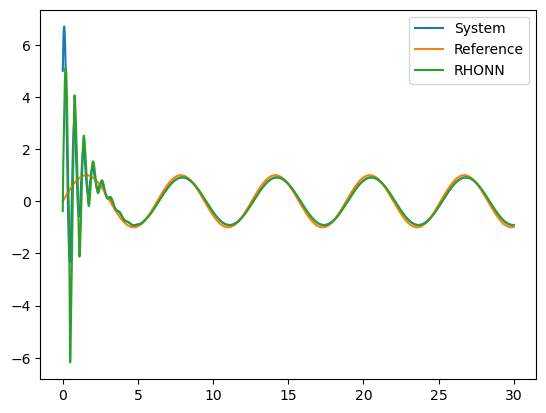

In [85]:
tf = 30 #segundo
T = 0.01
x0 = np.array([5,3])

x = np.zeros( (2,int(tf/T) +1) )
X = np.zeros( (2,int(tf/T) +1) )
u = np.zeros( (int(tf/T) +1) )

x[:,0] = x0
u[0] = 0

np.random.seed(9)
w0 = np.random.normal(0,1,(2,1))
w1 = np.random.normal(0,1,(2,1))

X[:,0] = np.random.normal(0,1,2)

t = np.arange(0,tf,T)
xref = np.sin(t)

tsim = list( range(0, int(tf/T) ) )

S = lambda x: 1 / (1 + np.exp(-x))
P = 10E-10 * np.eye(2) 
Q = 10E-6 * np.eye(2)
R = 10E-15
eta = 0.1

wf = 1

for k in tsim:
    u[k+1] = -10*X[0,k] -14*x[1,k] - 14*(x[0,k] - xref[k] ) # control law 
    
    x[0,k+1] = x[0,k] + T *( 3*x[0,k] + 5*x[1,k] ) # system's state
    x[1,k+1] = x[1,k] + T *( 2*x[0,k] + 3*x[1,k] + u[k]) # system's state


    e = x[0,k] - X[0,k] # error x0 - X0
    H = np.array( [ [S(x[0,k])], [S(x[1,k])] ] )  # partial derivative of one of nn state with respect to one nn weight
    M = np.linalg.pinv(R + H.T@P@H) # 
    K = P @ H @ M # Kalman gain
    P = P - K@H.T@P + Q
    w0 = w0 + eta*K*e

    X[0,k+1] = w0[0]*S(x[0,k]) + w0[1]*S(x[1,k])
    #X[1,k+1] = w1[0]*S(x[k]) + w1[1]*S(x[k]) + wf*u[k]

#tmp= int(.6/T)
tmp = 0

plt.plot(t[tmp:],x[0,tmp:-1], label='System')
plt.plot(t[tmp:],xref[tmp:], label='Reference')
plt.plot(t[tmp:],X[0,tmp:-1], label='RHONN')
plt.legend()

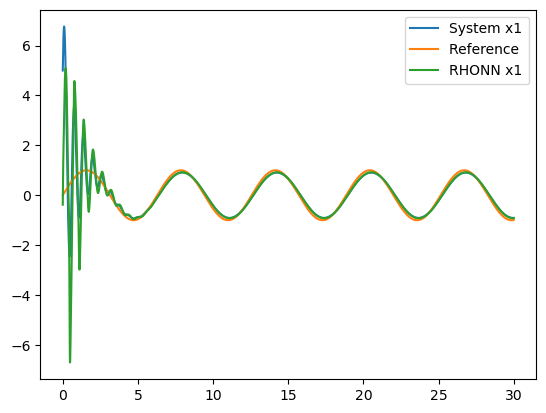

In [129]:
tf = 30 #segundo
T = 0.01
x0 = np.array([5,3])

x = np.zeros( (2,int(tf/T) +1) )
X = np.zeros( (2,int(tf/T) +1) )
u = np.zeros( (int(tf/T) +1) )

x[:,0] = x0
u[0] = 0

np.random.seed(9)
w0 = np.random.normal(0,1,(2,1))
w1 = np.random.normal(0,1,(2,1))

X[:,0] = np.random.normal(0,1,2)

t = np.arange(0,tf,T)
xref = np.sin(t)

tsim = list( range(0, int(tf/T) ) )

S = lambda x: 1 / (1 + np.exp(-x))

P = [10E-10 * np.eye(2), 10E-10 * np.eye(2)] 
Q = [10E-6 * np.eye(2), 10E-6 * np.eye(2)]
R = [10E-15,10E-15]
eta = [0.1,1.5]

wf = 1

def EKF(H,w,k,edo=0):
    global x,X
    e = x[edo,k] - X[edo,k] # error x0 - X0    
    #H = np.array( [ [S(x[0,k])], [S(x[1,k])] ] )  # partial derivative of one of nn state with respect to one nn weight
    M = np.linalg.pinv(R[edo] + H.T@P[edo]@H) # 
    K = P[edo] @ H @ M # Kalman gain
    P[edo] = P[edo] - K@H.T@P[edo] + Q[edo]
    w = w + eta[edo]*K*e
        
    return w
    


for k in tsim:
    #u[k+1] = -10*x[0,k] -14*x[1,k] - 14*(x[0,k] - xref[k] ) # control law 
    #u[k+1] = -10*X[0,k] -14*x[1,k] - 14*(x[0,k] - xref[k] ) # control law 
    u[k+1] = -10*X[0,k] -14*X[1,k] - 14*(x[0,k] - xref[k] ) # control law 
    
    x[0,k+1] = x[0,k] + T *( 3*x[0,k] + 5*x[1,k] ) # system's state
    x[1,k+1] = x[1,k] + T *( 2*x[0,k] + 3*x[1,k] + u[k]) # system's state

    H = np.array( [ [S(x[0,k])], [S(x[1,k])] ] )
    w0=EKF(H,w0,k,0)   
    #X[0,k+1] = w0[0]*S(x[0,k]) + w0[1]*S(x[1,k])
    X[0,k+1] = w0.T@H

    H = np.array( [ [S(x[0,k])], [S(x[1,k])] ] )
    w1=EKF(H,w1,k,1)
    #X[1,k+1] = w1[0]*S(x[0,k]) + w1[1]*S(x[1,k]) + wf*u[k]
    X[1,k+1] = w1.T@H
    
#tmp= int(.6/T)
tmp = 0

plt.plot(t[tmp:],x[0,tmp:-1], label='System x1')
plt.plot(t[tmp:],xref[tmp:], label='Reference ')
plt.plot(t[tmp:],X[0,tmp:-1], label='RHONN x1')
plt.legend()

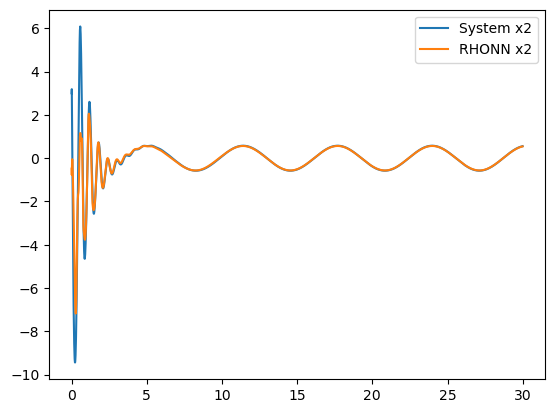

In [113]:
plt.plot(t[tmp:],x[1,tmp:-1], label='System x2')
plt.plot(t[tmp:],X[1,tmp:-1], label='RHONN x2')
plt.legend()

Sintonizando control

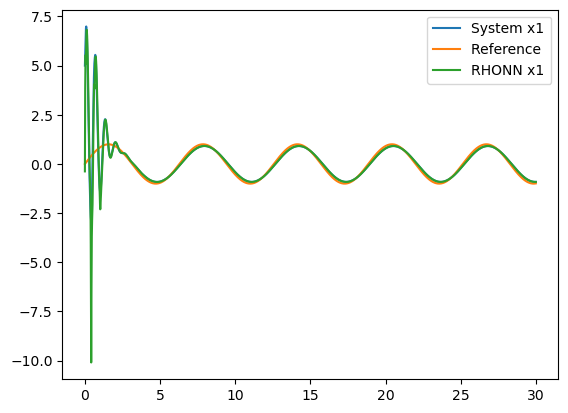

In [163]:
tf = 30 #segundo
T = 0.01
x0 = np.array([5,3])

x = np.zeros( (2,int(tf/T) +1) )
X = np.zeros( (2,int(tf/T) +1) )
u = np.zeros( (int(tf/T) +1) )

x[:,0] = x0
u[0] = 0

np.random.seed(9)
w0 = np.random.normal(0,1,(2,1))
w1 = np.random.normal(0,1,(2,1))

X[:,0] = np.random.normal(0,1,2)

t = np.arange(0,tf,T)
xref = np.sin(t)

tsim = list( range(0, int(tf/T) ) )

S = lambda x: 1 / (1 + np.exp(-x))

P = [10E-10 * np.eye(2), 10E-10 * np.eye(2)] 
Q = [10E-6 * np.eye(2), 10E-6 * np.eye(2)]
R = [10E-15,10E-15]
eta = [0.5,1]

wf = 1

def EKF(H,w,k,edo=0):
    global x,X
    e = x[edo,k] - X[edo,k] # error x0 - X0    
    #H = np.array( [ [S(x[0,k])], [S(x[1,k])] ] )  # partial derivative of one of nn state with respect to one nn weight
    M = np.linalg.pinv(R[edo] + H.T@P[edo]@H) # 
    K = P[edo] @ H @ M # Kalman gain
    P[edo] = P[edo] - K@H.T@P[edo] + Q[edo]
    w = w + eta[edo]*K*e
        
    return w
    


for k in tsim:
    #u[k+1] = -10*x[0,k] -14*x[1,k] - 14*(x[0,k] - xref[k] ) # control law 
    #u[k+1] = -10*X[0,k] -14*x[1,k] - 14*(x[0,k] - xref[k] ) # control law 
    u[k+1] = -10*X[0,k] -14*X[1,k] - 14*(X[0,k] - xref[k] ) # control law 
    
    x[0,k+1] = x[0,k] + T *( 3*x[0,k] + 5*x[1,k] )  # system's state
    x[1,k+1] = x[1,k] + T *( 2*x[0,k] + 3*x[1,k] + u[k]) # system's state

    H = np.array( [ [S(x[0,k])], [S(x[1,k])] ] )
    w0=EKF(H,w0,k,0)   
    #X[0,k+1] = w0[0]*S(x[0,k]) + w0[1]*S(x[1,k])
    X[0,k+1] = w0.T@H

    #H = np.array( [ [S(x[0,k])], [S(x[1,k])*S(x[0,k])] ] )
    #H = np.array( [ [S(x[0,k])], [S(x[1,k])**3] ] )
    H = np.array( [ [S(x[0,k])], [S(x[1,k])] ] )
    w1=EKF(H,w1,k,1)
    #X[1,k+1] = w1[0]*S(x[0,k]) + w1[1]*S(x[1,k]) + wf*u[k]
    X[1,k+1] = w1.T@H
    
#tmp= int(.6/T)
tmp = 0

plt.plot(t[tmp:],x[0,tmp:-1], label='System x1')
plt.plot(t[tmp:],xref[tmp:], label='Reference ')
plt.plot(t[tmp:],X[0,tmp:-1], label='RHONN x1')
plt.legend()

Con ruido

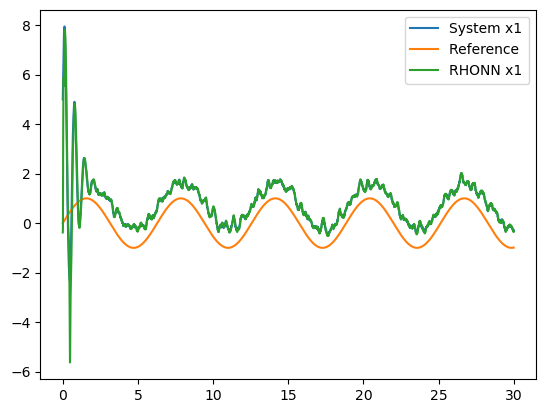

In [187]:
tf = 30 #segundo
T = 0.01
x0 = np.array([5,3])

x = np.zeros( (2,int(tf/T) +1) )
X = np.zeros( (2,int(tf/T) +1) )
u = np.zeros( (int(tf/T) +1) )

x[:,0] = x0
u[0] = 0

np.random.seed(9)
w0 = np.random.normal(0,1,(2,1))
w1 = np.random.normal(0,1,(2,1))

X[:,0] = np.random.normal(0,1,2)

t = np.arange(0,tf,T)
xref = np.sin(t)

tsim = list( range(0, int(tf/T) ) )

S = lambda x: 1 / (1 + np.exp(-x))

P = [10E-10 * np.eye(2), 10E-10 * np.eye(2)] 
Q = [10E-6 * np.eye(2), 10E-6 * np.eye(2)]
R = [10E-7,10E-10]
eta = [0.5,1]

wf = 1

def EKF(H,w,k,edo=0):
    global x,X
    e = x[edo,k] - X[edo,k] # error x0 - X0    
    #H = np.array( [ [S(x[0,k])], [S(x[1,k])] ] )  # partial derivative of one of nn state with respect to one nn weight
    M = np.linalg.pinv(R[edo] + H.T@P[edo]@H) # 
    K = P[edo] @ H @ M # Kalman gain
    P[edo] = P[edo] - K@H.T@P[edo] + Q[edo]
    w = w + eta[edo]*K*e
        
    return w
    


for k in tsim:
    #u[k+1] = -10*x[0,k] -14*x[1,k] - 14*(x[0,k] - xref[k] ) # control law 
    #u[k+1] = -10*X[0,k] -14*x[1,k] - 14*(x[0,k] - xref[k] ) # control law 
    u[k+1] = -10*X[0,k] -14*X[1,k] - 14*(X[0,k] - xref[k] ) # control law 
    
    x[0,k+1] = x[0,k] + T *( 3*x[0,k] + 5*x[1,k] ) +np.random.uniform(0,1)/10 # system's state
    x[1,k+1] = x[1,k] + T *( 2*x[0,k] + 3*x[1,k] + u[k]) # system's state

    H = np.array( [ [S(x[0,k])], [S(x[1,k])] ] )
    w0=EKF(H,w0,k,0)   
    #X[0,k+1] = w0[0]*S(x[0,k]) + w0[1]*S(x[1,k])
    X[0,k+1] = w0.T@H

    #H = np.array( [ [S(x[0,k])], [S(x[1,k])*S(x[0,k])] ] )
    #H = np.array( [ [S(x[0,k])], [S(x[1,k])**3] ] )
    H = np.array( [ [S(x[0,k])], [S(x[1,k])] ] )
    w1=EKF(H,w1,k,1)
    #X[1,k+1] = w1[0]*S(x[0,k]) + w1[1]*S(x[1,k]) + wf*u[k]
    X[1,k+1] = w1.T@H
    
#tmp= int(.9/T)
#tmp= int(2/T)
tmp = 0

plt.plot(t[tmp:],x[0,tmp:-1], label='System x1')
plt.plot(t[tmp:],xref[tmp:], label='Reference ')
plt.plot(t[tmp:],X[0,tmp:-1], label='RHONN x1')
plt.legend()

Filtro de particulas

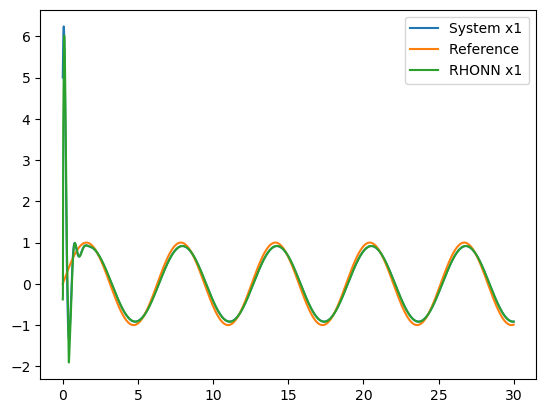

In [188]:
tf = 30 #segundo
T = 0.01
x0 = np.array([5,3])

x = np.zeros( (2,int(tf/T) +1) )
X = np.zeros( (2,int(tf/T) +1) )
u = np.zeros( (int(tf/T) +1) )

x[:,0] = x0
u[0] = 0

np.random.seed(9)
w0 = np.random.normal(0,1,(2,1))
w1 = np.random.normal(0,1,(2,1))

X[:,0] = np.random.normal(0,1,2)

t = np.arange(0,tf,T)
xref = np.sin(t)

tsim = list( range(0, int(tf/T) ) )

S = lambda x: 1 / (1 + np.exp(-x))

P = [10E-10 * np.eye(2), 10E-10 * np.eye(2)] 
Q = [10E-6 * np.eye(2), 10E-6 * np.eye(2)]
R = [10E-7,10E-10]
eta = [0.5,1]

wf = 1

def EKF(H,w,k,edo=0):
    global x,X
    e = x[edo,k] - X[edo,k] # error x0 - X0    
    #H = np.array( [ [S(x[0,k])], [S(x[1,k])] ] )  # partial derivative of one of nn state with respect to one nn weight
    M = np.linalg.pinv(R[edo] + H.T@P[edo]@H) # 
    K = P[edo] @ H @ M # Kalman gain
    P[edo] = P[edo] - K@H.T@P[edo] + Q[edo]
    w = w + eta[edo]*K*e
        
    return w
    


for k in tsim:
    u[k+1] = -10*x[0,k] -14*x[1,k] - 14*(x[0,k] - xref[k] ) # control law 
    #u[k+1] = -10*X[0,k] -14*x[1,k] - 14*(x[0,k] - xref[k] ) # control law 
    #u[k+1] = -10*X[0,k] -14*X[1,k] - 14*(X[0,k] - xref[k] ) # control law 
    
    x[0,k+1] = x[0,k] + T *( 3*x[0,k] + 5*x[1,k] )  # system's state
    x[1,k+1] = x[1,k] + T *( 2*x[0,k] + 3*x[1,k] + u[k]) # system's state

    H = np.array( [ [S(x[0,k])], [S(x[1,k])] ] )
    w0=EKF(H,w0,k,0)   
    #X[0,k+1] = w0[0]*S(x[0,k]) + w0[1]*S(x[1,k])
    X[0,k+1] = w0.T@H

    #H = np.array( [ [S(x[0,k])], [S(x[1,k])*S(x[0,k])] ] )
    #H = np.array( [ [S(x[0,k])], [S(x[1,k])**3] ] )
    H = np.array( [ [S(x[0,k])], [S(x[1,k])] ] )
    w1=EKF(H,w1,k,1)
    #X[1,k+1] = w1[0]*S(x[0,k]) + w1[1]*S(x[1,k]) + wf*u[k]
    X[1,k+1] = w1.T@H
    
#tmp= int(.9/T)
#tmp= int(2/T)
tmp = 0

plt.plot(t[tmp:],x[0,tmp:-1], label='System x1')
plt.plot(t[tmp:],xref[tmp:], label='Reference ')
plt.plot(t[tmp:],X[0,tmp:-1], label='RHONN x1')
plt.legend()